# Model Results

This notebook plots the results of the trained models

In [2]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib as mpl 
import matplotlib.pyplot as plt
import torch.nn as nn

In [4]:
sys.path.insert(0, os.path.abspath('../model_and_training_fns'))
from model_definition import CNN

## Plotting Helper Functions

In [5]:
def print_formatted_df(df: pd.DataFrame):
    pd.options.display.float_format = '{:.3e}'.format
    df = df.style.format({'LEARN_RATE': '{:.0e}',
                          'TEST_AVG': '{:.3e}',
                          'TOTAL_TIME': '{:.3f} hr', 
                          'AVG_EPOCH_TIME': '{:.3f} min',
                          'NUM_PARAMS': '{:.3e}',
                          'AVG_FILE_SIZE': '{:.3e} bytes'},)
    display(df)

In [6]:
def find_duplicates(df: pd.DataFrame, idx: int):
    for col in df.columns:
        df = df.loc[df[col]==df.loc[idx, col]]
        
    return df

In [11]:
def parse_dfs(studyID: int, studies_df: pd.DataFrame, verbose: bool=True):
    directory = os.path.join('..', 'trained_models')
    study = 'study_{:02d}'.format(studyID)
    summary = 'study{:02d}_trainval_summary.csv'.format(studyID)
    testing = 'study{:02d}_testset_results.csv'.format(studyID)
    summary_path = os.path.join(directory, study, summary)
    summary_data = pd.read_csv(summary_path, index_col=0)
    max_epoch = summary_data.index.max()
    train_time = summary_data.sum()['epoch_time'] / 60
    avg_train_time = ( train_time / max_epoch ) * 60
    if verbose: print('Model', studyID, 'took', round(train_time,2), 'hours to train', str(max_epoch), 'epochs,\naverage of', round(avg_train_time, 2) ,'min per epoch.')
    studies_df.loc[studyID, 'TOTAL_TIME'] = train_time
    studies_df.loc[studyID, 'AVG_EPOCH_TIME'] = avg_train_time
    testing_path = os.path.join(directory, study, testing)
    test_data = pd.read_csv(testing_path, index_col=0)
    test_loss = test_data.mean()['loss']
    if verbose: print('Model', studyID, 'Average Loss on Test Set: {:e}'.format(test_loss))
    studies_df.loc[studyID, 'TEST_AVG'] = test_loss
    
    return summary_data, test_loss

In [8]:
def plot_study(ax: mpl.axes.Axes, summary_data: pd.DataFrame, test_loss: float, title: str):
    max_epoch = summary_data.index.max()
    ax.plot(np.arange(1, max_epoch+1), summary_data['train_loss'], label='Training Loss')
    ax.plot(np.arange(1, max_epoch+1), summary_data['val_loss'], label='Validation Loss')
    ax.axhline(test_loss, color='k', linestyle='--', label='Avg Test Loss')
    ax.legend()
    ax.set_xlabel('Epoch', fontsize=12)
    ax.set_ylabel('Loss', fontsize=12)
    ax.set_xticks(np.arange(0, max_epoch+1, 30))
    ax.set_title(title, fontsize=16);

## Results

In [9]:
directory = os.path.join('..', 'trained_models')
base_path = os.path.join(directory, 'hyperparameters.csv')
base_studies = pd.read_csv(base_path, index_col=0, comment='#')
base_studies['TEST_AVG'] = ''
base_studies['TOTAL_TIME'] = '' #In hours
base_studies['AVG_EPOCH_TIME'] = '' #In minutes
base_studies

,LE_KERNEL,LE_NEURONS,LE_BIAS,LE_DEPTH,ACTIVATION,DENSE_NEURONS,DENSE_BIAS,DENSE_DEPTH,LEARN_RATE,TOTAL_EPOCHS,TEST_AVG,TOTAL_TIME,AVG_EPOCH_TIME
studyIDX,,,,,,,,,,,,,
1,3,8,True,3,nn.ReLU,32,True,4,0.000001,500,,,
10,3,8,True,3,nn.ReLU,32,True,4,0.000001,1000,,,
5,3,8,True,3,nn.ReLU,32,True,4,0.000010,500,,,
4,3,8,True,3,nn.ReLU,32,True,4,0.000100,500,,,
3,3,8,True,3,nn.ReLU,32,True,4,0.001000,500,,,
2,3,8,True,3,nn.ReLU,32,True,4,0.010000,500,,,


Model 1 took 47.7 hours to train 500 epochs,
average of 5.72 min per epoch.
Model 1 Average Loss on Test Set: 2.974846e+00


Model 10 took 94.56 hours to train 1000 epochs,
average of 5.67 min per epoch.
Model 10 Average Loss on Test Set: 3.088427e+00


Model 5 took 46.95 hours to train 500 epochs,
average of 5.63 min per epoch.
Model 5 Average Loss on Test Set: 3.152702e+00


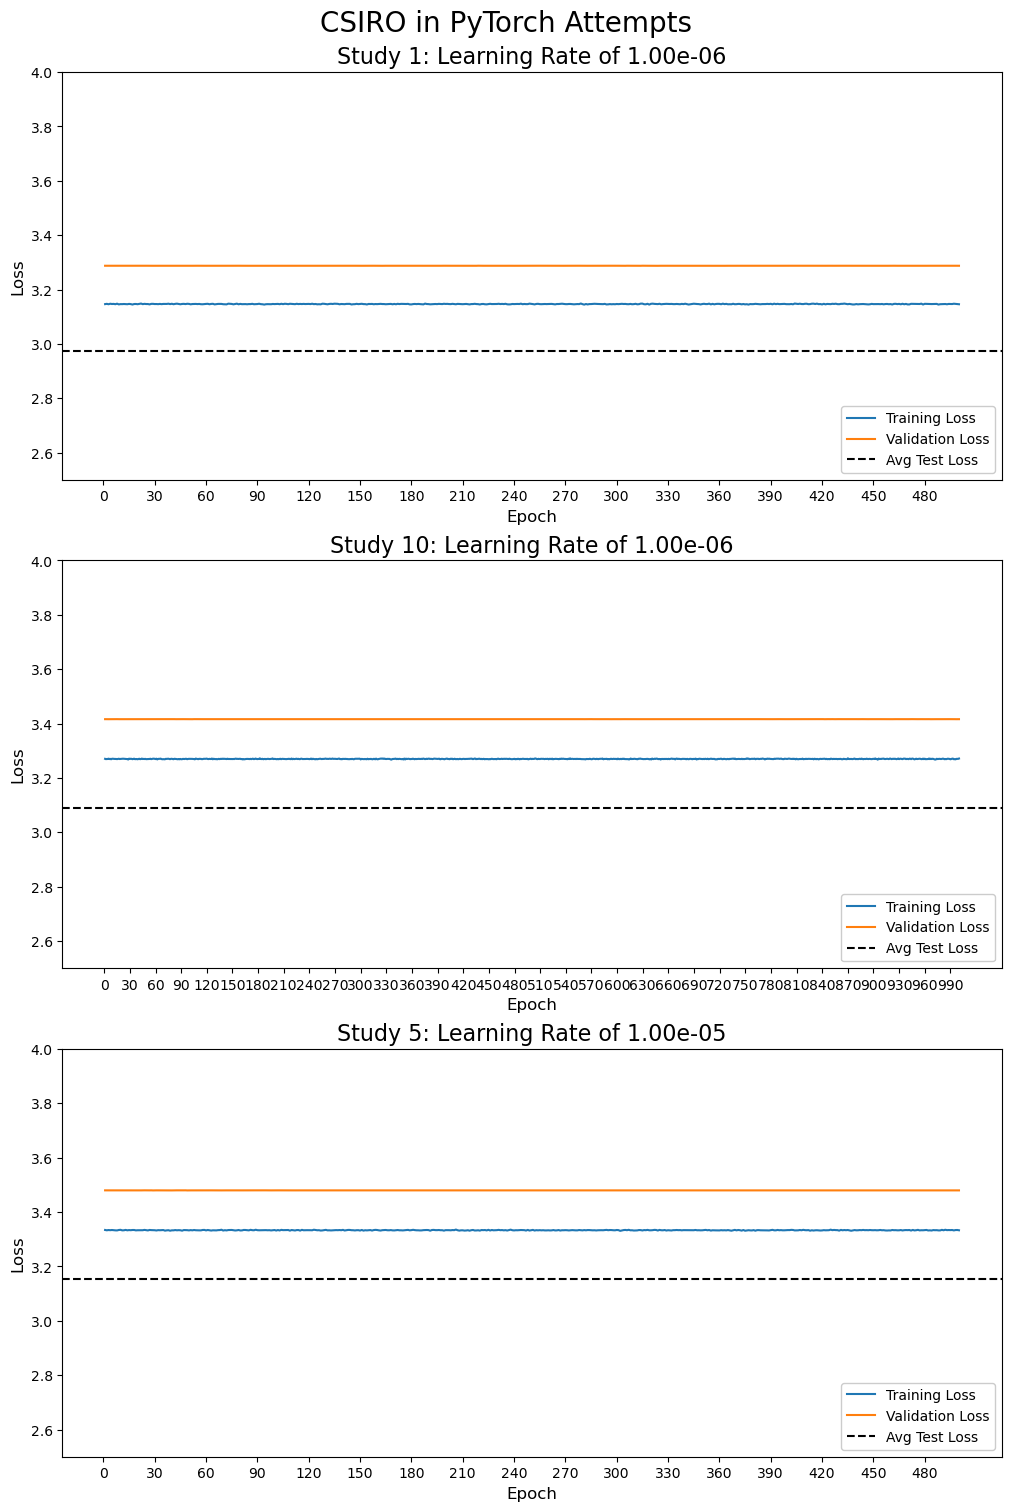

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,15), layout='constrained')
fig.suptitle('CSIRO in PyTorch Attempts', fontsize=20)

studyID = 1
summary_data, test_loss = parse_dfs(studyID, studies_df=base_studies)
title = 'Study '+str(studyID)+': Learning Rate of {:.2e}'.format(base_studies.loc[studyID, 'LEARN_RATE'])
plot_study(ax1, summary_data, test_loss, title)
ax1.set_ylim([2.5, 4.0])
ax1.legend(loc='lower right', framealpha=1.0)

print('\n')
studyID = 10
summary_data, test_loss = parse_dfs(studyID, studies_df=base_studies)
title = 'Study '+str(studyID)+': Learning Rate of {:.2e}'.format(base_studies.loc[studyID, 'LEARN_RATE'])
plot_study(ax2, summary_data, test_loss, title)
ax2.set_ylim([2.5, 4.0])
ax2.legend(loc='lower right', framealpha=1.0)

print('\n')
studyID = 5
summary_data, test_loss = parse_dfs(studyID, studies_df=base_studies)
title = 'Study '+str(studyID)+': Learning Rate of {:.2e}'.format(base_studies.loc[studyID, 'LEARN_RATE'])
plot_study(ax3, summary_data, test_loss, title)
ax3.set_ylim([2.5, 4.0])
ax3.legend(loc='lower right', framealpha=1.0)


In [13]:
base_studies

,LE_KERNEL,LE_NEURONS,LE_BIAS,LE_DEPTH,ACTIVATION,DENSE_NEURONS,DENSE_BIAS,DENSE_DEPTH,LEARN_RATE,TOTAL_EPOCHS,TEST_AVG,TOTAL_TIME,AVG_EPOCH_TIME
studyIDX,,,,,,,,,,,,,
1,3,8,True,3,nn.ReLU,32,True,4,0.000001,500,2.974846,47.695606,5.723473
10,3,8,True,3,nn.ReLU,32,True,4,0.000001,1000,3.088427,94.561506,5.67369
5,3,8,True,3,nn.ReLU,32,True,4,0.000010,500,3.152702,46.949861,5.633983
4,3,8,True,3,nn.ReLU,32,True,4,0.000100,500,,,
3,3,8,True,3,nn.ReLU,32,True,4,0.001000,500,,,
2,3,8,True,3,nn.ReLU,32,True,4,0.010000,500,,,
